Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Antonov Dmitriy"
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [2]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def l(self, x, k):
        P = np.ones_like(x)
        m = self.xk.shape[0]
        for i in range(m):
            if k == i: continue
            P *= (x - self.xk[i])/(self.xk[k] - self.xk[i])
#             if P == 0: break
        return P
        
    def __call__(self, x):
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        m = self.xk.shape[0]
        s = np.zeros_like(x)
        for i in range(m):
            s += self.yk[i]*self.l(x, i)
        return s

In [3]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


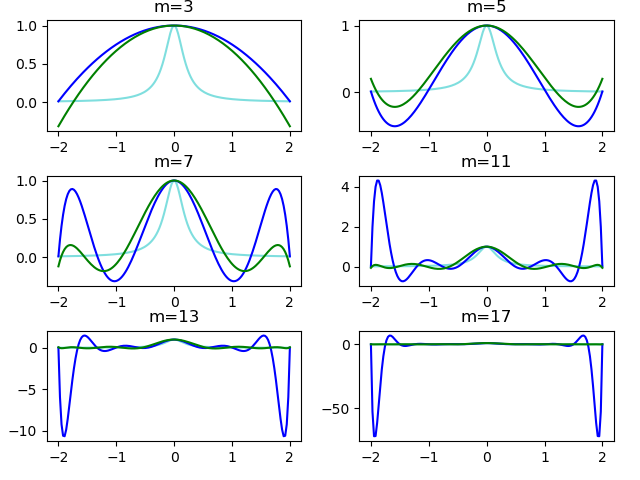

In [5]:
fig, axes = plt.subplots(3, 2)
plt.tight_layout()
f = lambda x: 1 / (1 + 25 * x**2)
for i, m in enumerate([3, 5, 7, 11, 13, 17]):
    x = np.linspace(-2, 2, 150)
    x1 = np.linspace(-2, 2, m)
    x2 = 2 * np.cos((2 * np.arange(m) + 1) / (2 * m) * np.pi)
    f1 = LagrangeInterpolator(x1, f(x1))
    f2 = LagrangeInterpolator(x2, f(x2))
    axes[i//2, i%2].plot(x, f(x), "c", alpha=0.5)
    axes[i//2, i%2].plot(x, f1(x), "b")
    axes[i//2, i%2].plot(x, f2(x), "g")
    axes[i//2, i%2].title.set_text(f'm={m}')

На рисунке выше цианом показана функция Рунге, синим - интерполяция на равномерной сетке, зеленым - на узлах Чебышева

Как видно из рисунка, на узлах Чебышева интерполяция гораздо лучше при больших m, так как эффект Рунге проявляется в меньшей степени, особенно на концах.(Заметно при $m=13$ и $m=17$), но при небольшом отдалении от центра на равномерной сетке ошибка немного меньше(связано с "разрешением" сеток в середине)

### Посмотрим на ошибку

<IPython.core.display.Javascript object>


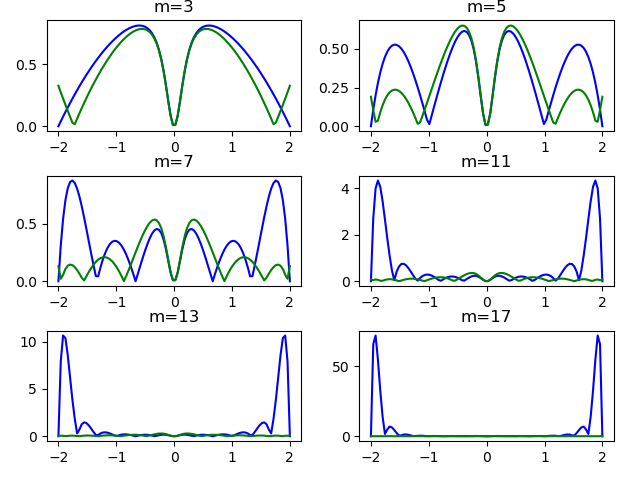

In [6]:
fig, axes = plt.subplots(3, 2)
plt.tight_layout()
f = lambda x: 1 / (1 + 25 * x**2)
for i, m in enumerate([3, 5, 7, 11, 13, 17]):
    x1 = np.linspace(-2, 2, m)
    x2 = 2 * np.cos((2 * np.arange(m) + 1) / (2 * m) * np.pi)
    f1 = LagrangeInterpolator(x1, f(x1))
    f2 = LagrangeInterpolator(x2, f(x2))
    x = np.linspace(-2, 2, 100)
    axes[i//2, i%2].plot(x, np.abs(f1(x) - f(x)), "b")
    axes[i//2, i%2].plot(x, np.abs(f2(x) - f(x)), "g")
    axes[i//2, i%2].title.set_text(f'm={m}')